目标结果 (x_1, x_2) = (3, 0.5)
优化结果 (x_1, x_2) = (2.999998, 0.499999)


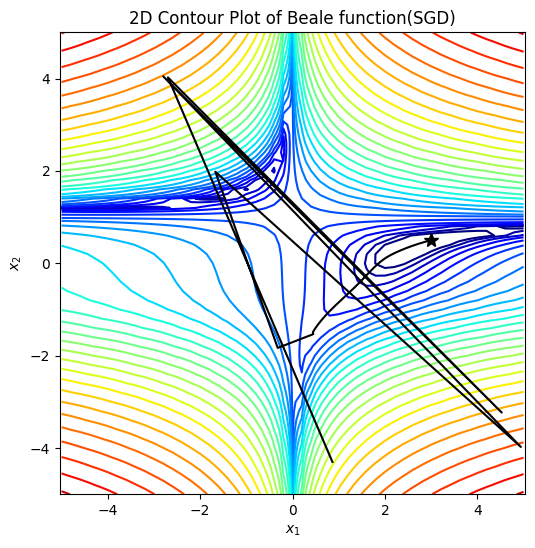

In [1]:
'''自定义SGD优化器函数来实现求解Beale函数的最小值
    X=X-Eta*dJ/dX
'''
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as plt_cl # Matplotlib的色阶条
# ----------定义目标函数beale、目标函数的偏导函数dbeale_dx、优化器函数Optimizer,并画出目标函数----------

#定义beale公式
def beale(x1,x2):
    return (1.5-x1+x1*x2)**2+(2.25-x1+x1*x2**2)**2+(2.625-x1+x1*x2**3)**2

#定义beale公式的偏导函数
def dbeale_dx(x1, x2):
    dfdx1 = 2*(1.5-x1+x1*x2)*(x2-1)+2*(2.25-x1+x1*x2**2)*(x2**2-1)+2*(2.625-x1+x1*x2**3)*(x2**3-1)  # 求beale公式关于x1的偏导数
    dfdx2 = 2*(1.5-x1+x1*x2)*x1+2*(2.25-x1+x1*x2**2)*(2*x1*x2)+2*(2.625-x1+x1*x2**3)*(3*x1*x2**2)   # 求beale公式关于x2的偏导数
    return dfdx1, dfdx2

#定义SGD优化器,返回训练过程中的最小值点
def Optimizer():
    Epoch_time=4000
    Eta=0.01
    x_traj=[]
    x1=random.uniform(-5.0,5.2)
    x2=random.uniform(-5.0,5.2)
    x_traj.append([x1,x2])
    # print("Epoch %d: (%f, %f)"%(0,x1,x2))
    for i in range(Epoch_time):
        dfdx1,dfdx2=dbeale_dx(x1,x2)
        x1-=Eta*dfdx1
        x2-=Eta*dfdx2
        while x1<-5 or x1>5:                                #防止超出范围导致正负溢出
            x1+=Eta*dfdx1
            dfdx1/=2
            x1-=Eta*dfdx1
        while x2<-5 or x2>5:
            x2+=Eta*dfdx2
            dfdx2/=2
            x2-=Eta*dfdx2
        x_traj.append([x1,x2])
        # print("Epoch %d: (%f, %f)"%(i+1,x1,x2))
    return x1,x2,x_traj

#定义画图函数: 等高线图(标出最低点)+优化过程x坐标折线图
def gd_plot(x1,x2,x_traj):
    plt.rcParams['figure.figsize'] = [6, 6]                 # 窗口大小
    plt.contour(X1, X2, Y, levels=np.logspace(0,6,30), norm=plt_cl.LogNorm(), cmap=plt.cm.jet)      # 画等高线图
    plt.title('2D Contour Plot of Beale function(SGD)')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.axis('equal')                                       # 设置坐标轴为正方形
    plt.plot(x1,x2,'k*',markersize=10)                      # 画出最低点
    if len(x_traj)!=0:                                      # 绘制训练过程中x的取值变化
        x_traj = np.array(x_traj)                           # 将x_traj转为数组
        plt.plot(x_traj[:, 0], x_traj[:, 1], 'k-')          # 以x_traj的第一列为x轴坐标，第二列为y轴坐标进行画图
    plt.show()                                              # 两张图共用plt

step_x1,step_x2 = 0.2, 0.2
X1,X2=np.meshgrid(np.arange(-5,5+step_x1,step_x1),np.arange(-5,5+step_x2,step_x2))                  # 生成从-5到5步长为0.2的网格点(51*51)
Y = beale(X1, X2)                                           # 将x1,x2坐标带入beale公式
x1,x2,x_traj = Optimizer()
print("目标结果 (x_1, x_2) = (3, 0.5)")
print("优化结果 (x_1, x_2) = (%f, %f)"%(x1,x2))
gd_plot(x1,x2,x_traj)